In [1]:
from scipy import signal
def lowpass_filt(t,noisy_signal):
    fs = 100 # Sampling frequency

    fc = 25 # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(3, w, 'low')
    y = signal.filtfilt(b, a, noisy_signal)
 

    plt.figure
    plt.ylabel('Volt(1/1024V)')
    plt.xlabel('Time(s)')

    plt.plot(t, noisy_signal,'lightseagreen')
    plt.plot(t,y, 'palevioletred',alpha=0.8)
    plt.legend(('noisy signal', 'Filterd'), loc='best')
    plt.show()

    return y
    


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
#matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
matplotlib.rcParams['figure.figsize'] = (20,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


#df = pd.read_csv(os.path.join(os.getcwd(),'data/TRAIN00.TSV'), delim_whitespace=True)
#df.head()
#df = df[df.Time > 1500000]

In [3]:
activity = ["eat", 'wipe', 'type', 'write', 'fold', 'peg']

df_list = pd.DataFrame({})
for i,act in enumerate(activity):
    #print("%d:%s.csv" % (i,act))
    df = pd.read_csv(os.path.join(os.getcwd(),'data/matsumoto/right/' + act + '.TSV'), delim_whitespace=True)
    df = df[df['Time'] < 300000]
    
    df["Time"]+= 300000 * i 
    df_list = pd.concat([df_list, df])


In [4]:
df = df_list

In [5]:
df

,Time,Volt,Xaxis,Yaxis,Zaxis
0,475,53,384,313,527
1,671,52,393,319,529
2,863,53,407,438,542
3,1056,50,398,328,533
4,1247,49,385,332,541
5,1444,49,394,335,535
6,1641,46,408,328,539
7,1829,45,418,359,533
8,2016,45,444,344,517
9,2200,44,439,334,533


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


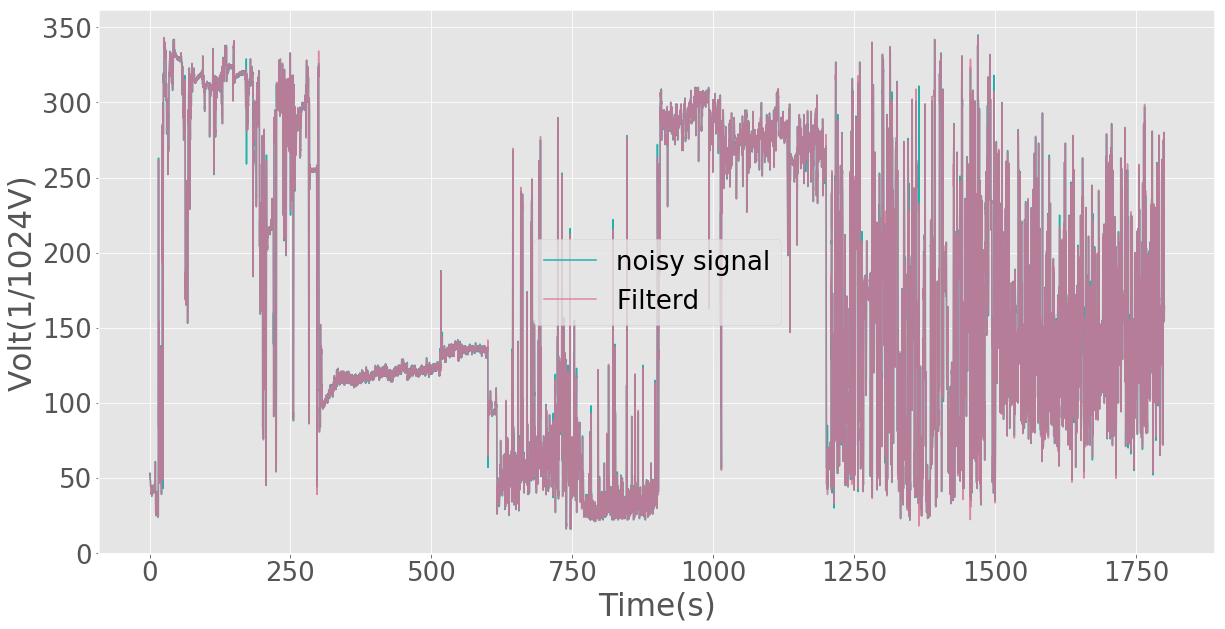

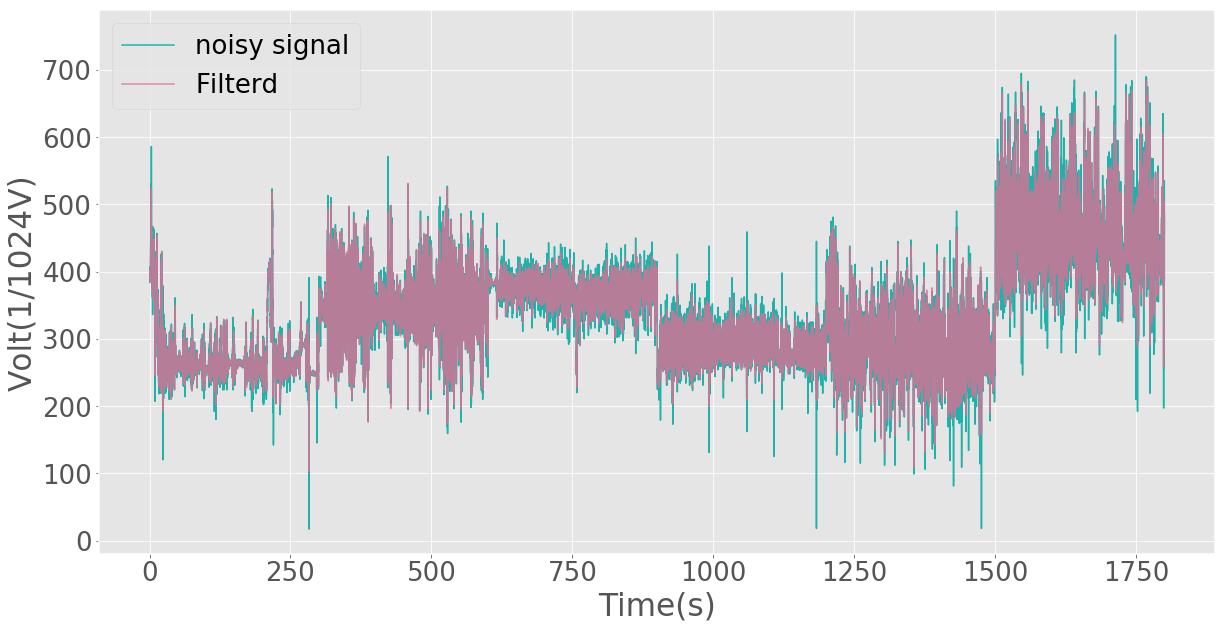

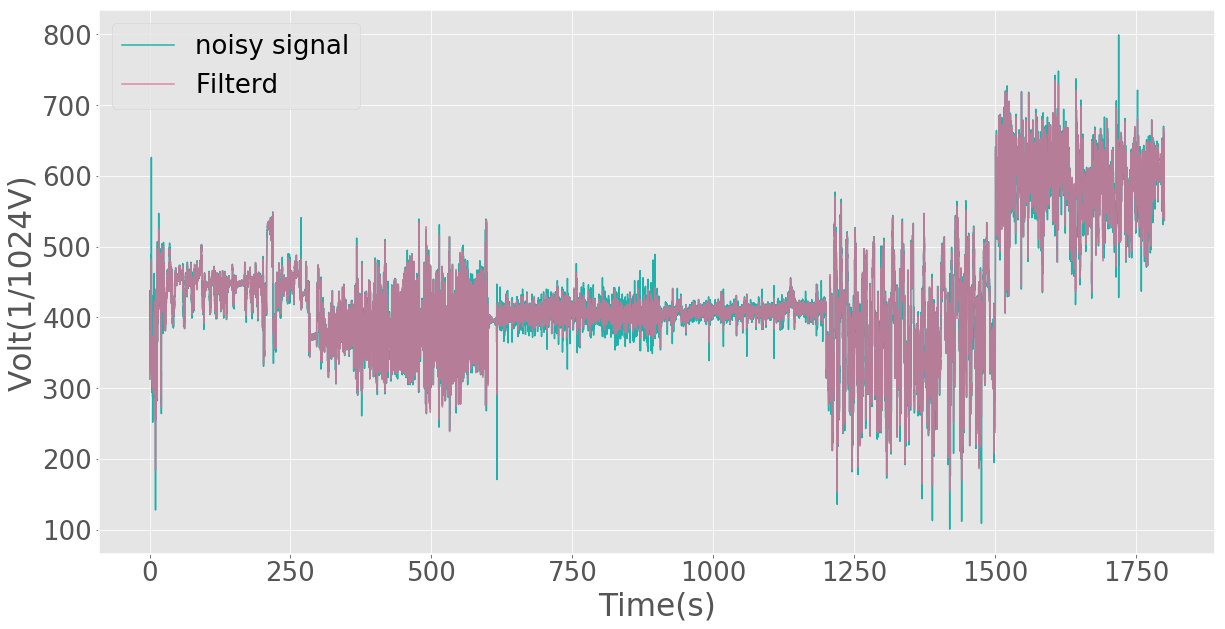

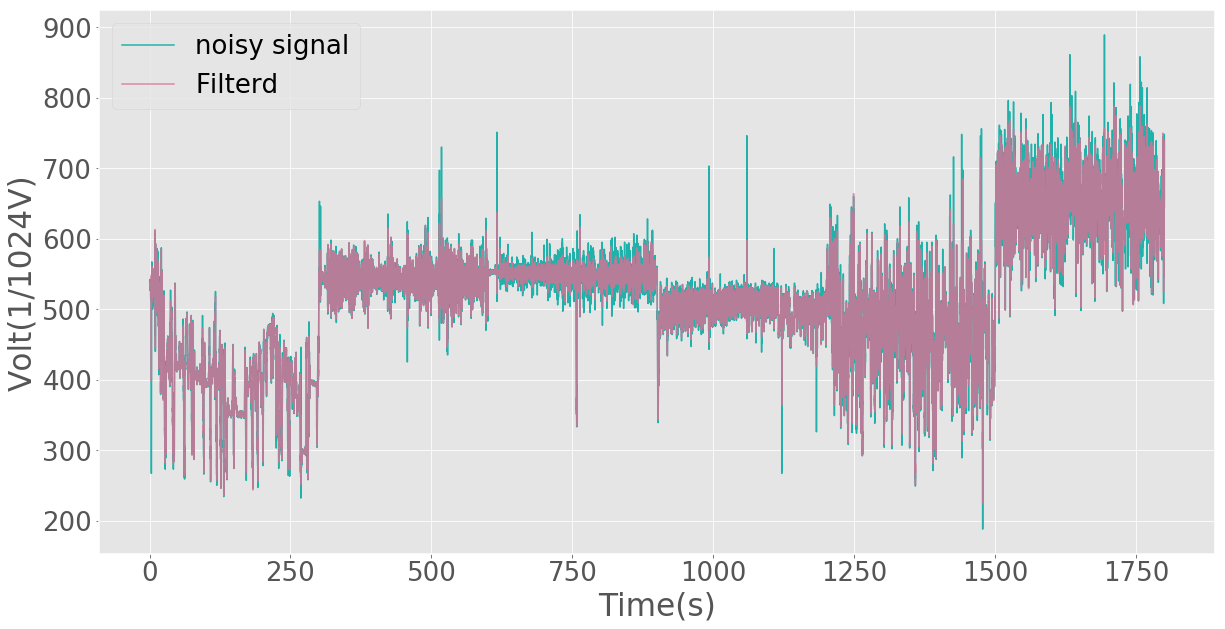

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z
0,0.475,53,384,313,527,53.000302,384.019525,313.042734,527.001024
1,0.671,52,393,319,529,52.732546,397.452314,361.899895,532.812810
2,0.863,53,407,438,542,51.914657,402.616437,381.370540,536.512780
3,1.056,50,398,328,533,50.623884,397.028861,360.816967,537.437426
4,1.247,49,385,332,541,49.367510,389.592352,330.472132,537.789710


In [6]:
df.Time = df.Time / 1000
df["Filterd"] = lowpass_filt(df.Time,df["Volt"])
df["Filt_X"] = lowpass_filt(df.Time,df["Xaxis"])
df["Filt_Y"] = lowpass_filt(df.Time,df["Yaxis"])
df["Filt_Z"] = lowpass_filt(df.Time,df["Zaxis"])
df.head()

In [7]:
df.Time = df.Time * 1000000000

df.index = pd.DatetimeIndex(df.Time,dtype='datetime64[ms]', freq=None)

len(df)
df.head()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z
Time,,,,,,,,,
1970-01-01 00:00:00.475,4.750000e+08,53,384,313,527,53.000302,384.019525,313.042734,527.001024
1970-01-01 00:00:00.671,6.710000e+08,52,393,319,529,52.732546,397.452314,361.899895,532.812810
1970-01-01 00:00:00.863,8.630000e+08,53,407,438,542,51.914657,402.616437,381.370540,536.512780
1970-01-01 00:00:01.056,1.056000e+09,50,398,328,533,50.623884,397.028861,360.816967,537.437426
1970-01-01 00:00:01.247,1.247000e+09,49,385,332,541,49.367510,389.592352,330.472132,537.789710


In [8]:
df = df.resample('1L').interpolate()

#df = df.drop("Time",axis=1)
#df.index = df.index.time
df.head()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z
Time,,,,,,,,,
1970-01-01 00:00:00.475,475000000.0,53.000000,384.000000,313.000000,527.000000,53.000302,384.019525,313.042734,527.001024
1970-01-01 00:00:00.476,476000000.0,52.994898,384.045918,313.030612,527.010204,52.998936,384.088059,313.292005,527.030676
1970-01-01 00:00:00.477,477000000.0,52.989796,384.091837,313.061224,527.020408,52.997570,384.156594,313.541277,527.060328
1970-01-01 00:00:00.478,478000000.0,52.984694,384.137755,313.091837,527.030612,52.996203,384.225129,313.790548,527.089980
1970-01-01 00:00:00.479,479000000.0,52.979592,384.183673,313.122449,527.040816,52.994837,384.293663,314.039819,527.119632


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


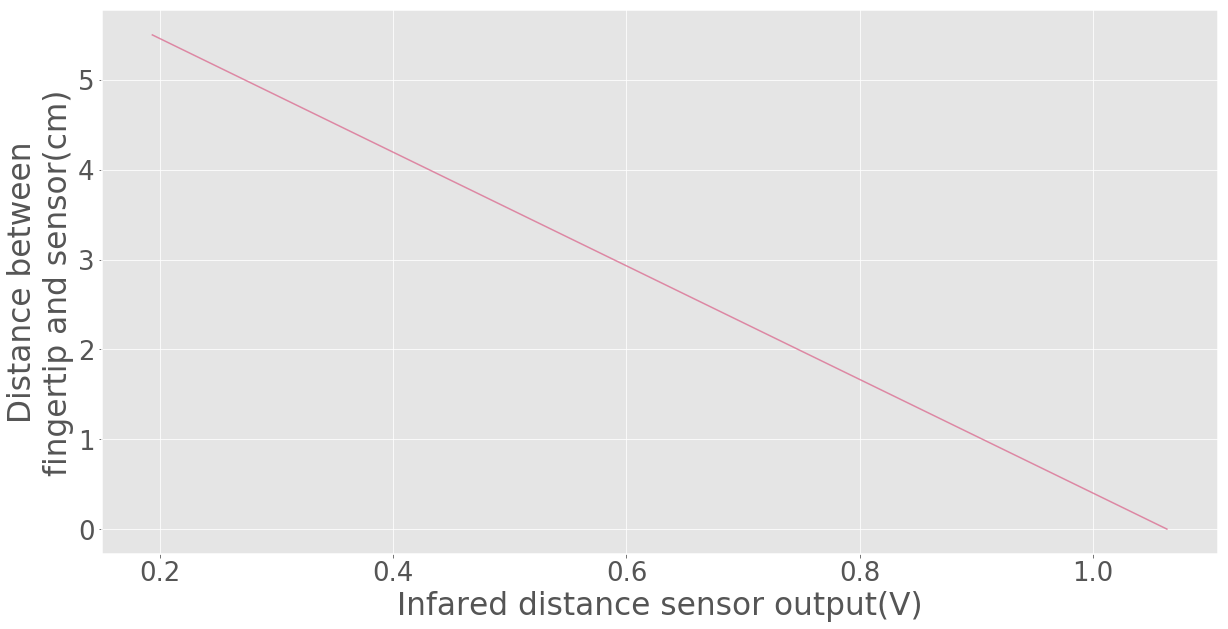

In [9]:
X = pd.DataFrame([330,60])

min = 0
max = 5.5
y = pd.DataFrame([min,max])
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)
X = 3.3*X/1024

plt.plot(X,y_fit, 'palevioletred',alpha=0.8)
plt.ylabel("Distance between\nfingertip and sensor(cm)")
plt.xlabel("Infared distance sensor output(V)")


In [10]:
dist_func = lambda x: x * regr.coef_ + regr.intercept_
df["Dist"] = df["Volt"].map(dist_func)
df["Dist"] = df["Dist"].values
df["Dist"] = df["Dist"].map(lambda x : min if x < min else (max if x > max else x))
df["Theta"] = df["Dist"].map(lambda x : math.degrees(math.acos(x/5.5)))
df["Angle"] = df["Theta"].map(lambda x : x*x/90)
df["Diff"] = df["Angle"].diff()

df["Fabs"] = np.fabs(df["Diff"])
df["Sum"] = df["Fabs"].cumsum()

df.Time = df.Time /1000000000


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


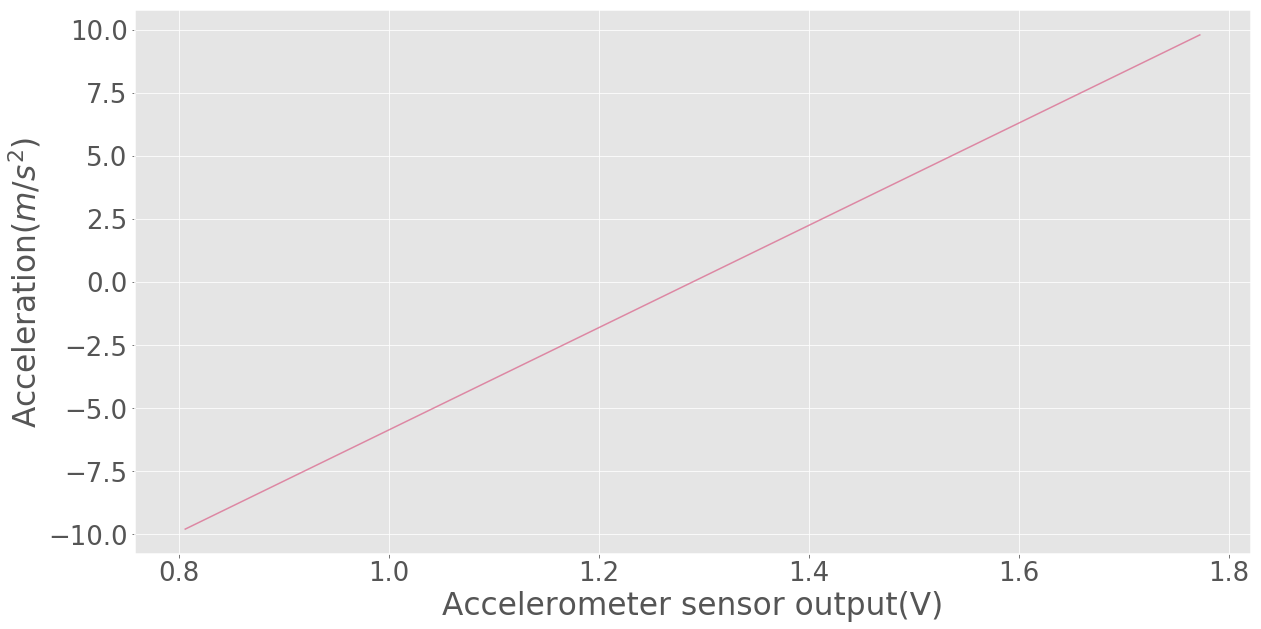

In [11]:
#Axis to accelerometry
X = pd.DataFrame([250,550])
y = pd.DataFrame([-9.8,9.8])
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)
acc_func = lambda x: x * regr.coef_ + regr.intercept_
df["Acc_X"] = df["Filt_X"].map(dist_func)
df["Acc_Y"] = df["Filt_Y"].map(dist_func)
df["Acc_Z"] = df["Filt_Z"].map(dist_func)
X = 3.3*X/1024
plt.plot(X,y_fit, 'palevioletred',alpha=0.8)
plt.ylabel("Acceleration$(m/s^2)$")
plt.xlabel("Accelerometer sensor output(V)")


In [12]:
df = df[df.Time > 0]
df

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z,Dist,Theta,Angle,Diff,Fabs,Sum,Acc_X,Acc_Y,Acc_Z
Time,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.475,0.475,53.000000,384.000000,313.000000,527.000000,53.000302,384.019525,313.042734,527.001024,5.5,0.000000,0.000000,NaN,NaN,NaN,[[-1.0440577131409228]],[[-5.681208037714757]],[[8.297400224629424]]
1970-01-01 00:00:00.476,0.476,52.994898,384.045918,313.030612,527.010204,52.998936,384.088059,313.292005,527.030676,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.0395801167687608]],[[-5.6649223174964725]],[[8.29933748681368]]
1970-01-01 00:00:00.477,0.477,52.989796,384.091837,313.061224,527.020408,52.997570,384.156594,313.541277,527.060328,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.035102520396599]],[[-5.648636597278188]],[[8.30127474899793]]
1970-01-01 00:00:00.478,0.478,52.984694,384.137755,313.091837,527.030612,52.996203,384.225129,313.790548,527.089980,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.0306249240244298]],[[-5.632350877059903]],[[8.303212011182186]]
1970-01-01 00:00:00.479,0.479,52.979592,384.183673,313.122449,527.040816,52.994837,384.293663,314.039819,527.119632,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.026147327652268]],[[-5.616065156841618]],[[8.305149273366442]]
1970-01-01 00:00:00.480,0.480,52.974490,384.229592,313.153061,527.051020,52.993471,384.362198,314.289090,527.149284,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.021669731280106]],[[-5.599779436623329]],[[8.307086535550692]]
1970-01-01 00:00:00.481,0.481,52.969388,384.275510,313.183673,527.061224,52.992105,384.430733,314.538361,527.178936,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.017192134907944]],[[-5.583493716405044]],[[8.309023797734948]]
1970-01-01 00:00:00.482,0.482,52.964286,384.321429,313.214286,527.071429,52.990739,384.499267,314.787633,527.208588,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.0127145385357785]],[[-5.5672079961867595]],[[8.310961059919197]]
1970-01-01 00:00:00.483,0.483,52.959184,384.367347,313.244898,527.081633,52.989373,384.567802,315.036904,527.238240,5.5,0.000000,0.000000,0.000000,0.000000,0.000000,[[-1.008236942163613]],[[-5.550922275968478]],[[8.312898322103454]]


([<matplotlib.axis.XTick at 0x129caf470>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


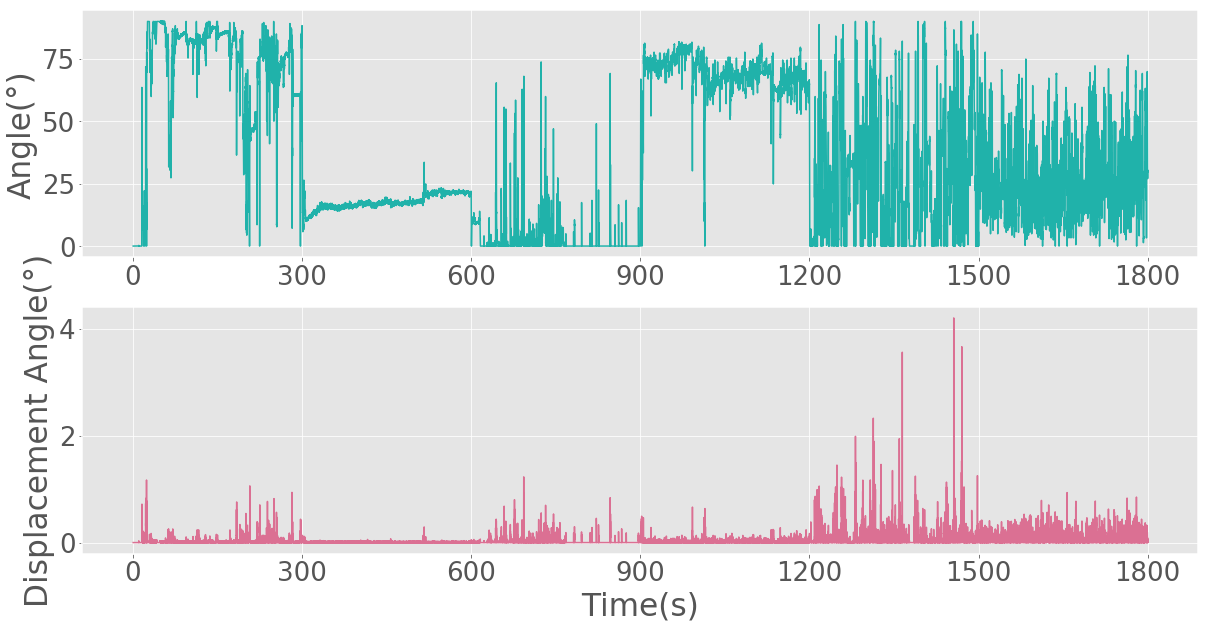

In [13]:
plt.subplot(2,1,1)
plt.plot(df.Time,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(2,1,2)
plt.plot(df.Time,df.Fabs,'palevioletred')
plt.ylabel("Displacement Angle(°)")
plt.xlabel("Time(s)")
plt.xticks([0,300,600,900,1200,1500,1800])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


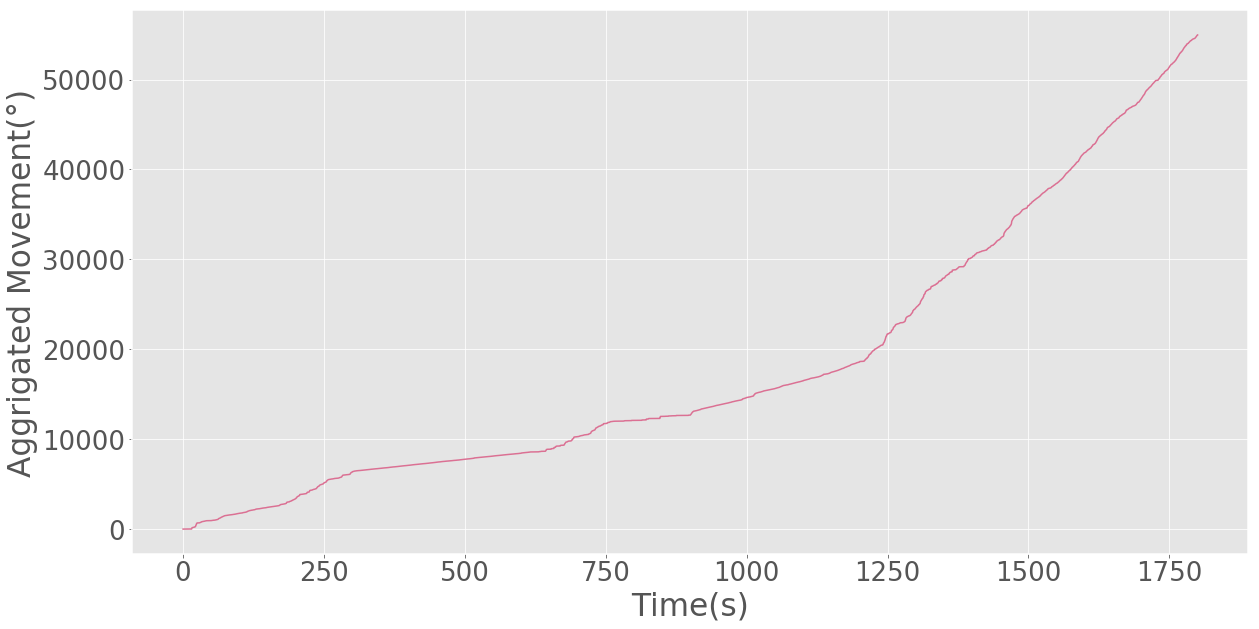

In [14]:
plt.plot(df.Time,df.Sum,'palevioletred')
plt.ylabel("Aggrigated Movement(°)")
plt.xlabel("Time(s)")

In [15]:
df.tail()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z,Dist,Theta,Angle,Diff,Fabs,Sum,Acc_X,Acc_Y,Acc_Z
Time,,,,,,,,,,,,,,,,,,
1970-01-01 00:29:59.981,1799.981,163.275862,488.517241,540.172414,656.724138,163.060524,482.558824,539.858218,654.063722,[[3.396232439335887]],51.866432,29.890298,-0.021446,0.021446,54967.986357,[[5.393843198754446]],[[9.137403547687857]],[[16.598829821510616]]
1970-01-01 00:29:59.982,1799.982,163.206897,488.137931,539.379310,653.793103,163.046063,483.670604,539.146351,651.797281,[[3.3976372924648786]],51.847824,29.868854,-0.021444,0.021444,54968.007801,[[5.4664794768893294]],[[9.0908949141233]],[[16.45075569016588]]
1970-01-01 00:29:59.983,1799.983,163.137931,487.758621,538.586207,650.862069,163.031601,484.782384,538.434484,649.530840,[[3.399042145593869]],51.829211,29.847412,-0.021442,0.021442,54968.029243,[[5.539115755024216]],[[9.044386280558744]],[[16.302681558821146]]
1970-01-01 00:29:59.984,1799.984,163.068966,487.379310,537.793103,647.931034,163.017140,485.894164,537.722617,647.264399,[[3.4004469987228605]],51.810593,29.825973,-0.021439,0.021439,54968.050682,[[5.6117520331590995]],[[8.997877646994194]],[[16.15460742747641]]
1970-01-01 00:29:59.985,1799.985,163.000000,487.000000,537.000000,645.000000,163.002679,487.005944,537.010750,644.997959,[[3.4018518518518515]],51.791971,29.804536,-0.021437,0.021437,54968.072119,[[5.684388311293986]],[[8.95136901342963]],[[16.006533296131682]]


In [16]:
df.describe()

,Time,Volt,Xaxis,Yaxis,Zaxis,Filterd,Filt_X,Filt_Y,Filt_Z,Theta,Angle,Diff,Fabs,Sum
count,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799511e+06,1.799510e+06,1.799510e+06,1.799510e+06
mean,9.002300e+02,1.709597e+02,3.397517e+02,4.336868e+02,5.178013e+02,1.709624e+02,3.397525e+02,4.336921e+02,5.177953e+02,4.830159e+01,3.539715e+01,1.656258e-05,3.054613e-02,1.820897e+04
std,5.194742e+02,9.525096e+01,7.557444e+01,8.336792e+01,8.644364e+01,9.522240e+01,7.506076e+01,8.323946e+01,8.627100e+01,2.920103e+01,2.981562e+01,7.786250e-02,7.162054e-02,1.461381e+04
min,4.750000e-01,1.600000e+01,1.700000e+01,1.010000e+02,1.880000e+02,1.595567e+01,1.027107e+02,1.533761e+02,2.251440e+02,0.000000e+00,0.000000e+00,-2.283310e+00,0.000000e+00,0.000000e+00
25%,4.503525e+02,1.002000e+02,2.788000e+02,3.940000e+02,4.747083e+02,1.003858e+02,2.789577e+02,3.945447e+02,4.748065e+02,3.166727e+01,1.114240e+01,-1.177295e-02,0.000000e+00,7.438206e+03
50%,9.002300e+02,1.408800e+02,3.313600e+02,4.104800e+02,5.267600e+02,1.408965e+02,3.314151e+02,4.102788e+02,5.267937e+02,4.553733e+01,2.304054e+01,0.000000e+00,1.178214e-02,1.267919e+04
75%,1.350108e+03,2.729600e+02,3.780714e+02,4.538750e+02,5.530000e+02,2.728782e+02,3.775975e+02,4.537581e+02,5.527811e+02,7.780384e+01,6.726042e+01,1.179332e-02,2.989785e-02,2.792941e+04
max,1.799985e+03,3.450000e+02,7.520000e+02,7.990000e+02,8.890000e+02,3.441664e+02,6.841686e+02,7.352883e+02,7.873937e+02,9.000000e+01,9.000000e+01,4.199036e+00,4.199036e+00,5.496807e+04


In [17]:
df_acc = df[["Acc_X","Acc_Y","Acc_Z"]]

df_acc_diff = df_acc.diff()
df[["Diff_X","Diff_Y","Diff_Z"]] = df_acc_diff
df_acc
df["Norm"] = np.sqrt(np.square(df_acc_diff).sum(axis=1))


In [18]:
df_acc_diff

,Acc_X,Acc_Y,Acc_Z
Time,,,
1970-01-01 00:00:00.475,NaN,NaN,NaN
1970-01-01 00:00:00.476,[[0.0044775963721619405]],[[0.016285720218284894]],[[0.001937262184256383]]
1970-01-01 00:00:00.477,[[0.0044775963721619405]],[[0.016285720218284894]],[[0.0019372621842492777]]
1970-01-01 00:00:00.478,[[0.004477596372169046]],[[0.016285720218284894]],[[0.001937262184256383]]
1970-01-01 00:00:00.479,[[0.0044775963721619405]],[[0.016285720218284894]],[[0.001937262184256383]]
1970-01-01 00:00:00.480,[[0.0044775963721619405]],[[0.016285720218288446]],[[0.0019372621842492777]]
1970-01-01 00:00:00.481,[[0.0044775963721619405]],[[0.016285720218284894]],[[0.001937262184256383]]
1970-01-01 00:00:00.482,[[0.004477596372165493]],[[0.016285720218284894]],[[0.0019372621842492777]]
1970-01-01 00:00:00.483,[[0.004477596372165493]],[[0.01628572021828134]],[[0.001937262184256383]]


In [19]:
df2 = df.resample('300S').sum()
df2.index = df2.index.time
df3 = df2[["Fabs","Norm"]]
df3
df4 = df3

In [20]:
df3.drop(df3.index)
df3.index = activity
df3.T

,eat,wipe,type,write,fold,peg
Fabs,6309.882651,2127.35564,4232.278100,5902.253758,17411.808479,18984.493491
Norm,4843.467866,10480.25382,5577.161877,7419.761542,12859.248010,15497.823382


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


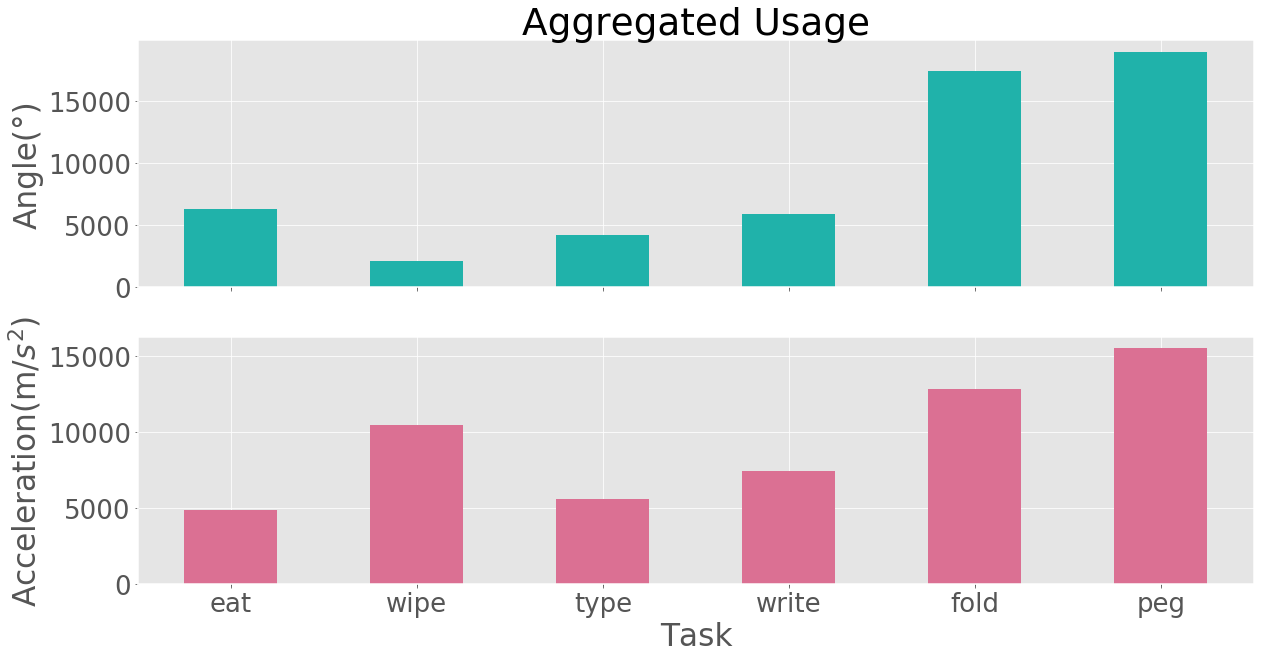

In [21]:
ax = df3.plot.bar(color=['lightseagreen','palevioletred'],subplots=True,figsize=(20,10))
ax[0].set_title('Aggregated Usage')
ax[0].set_ylabel('Angle(°)')
ax[0].get_legend().remove()

ax[1].set_title('')
ax[1].set_ylabel('Acceleration(m/$s^2$)')
ax[1].get_legend().remove()

plt.xlabel("Task")
plt.xticks(rotation=0)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


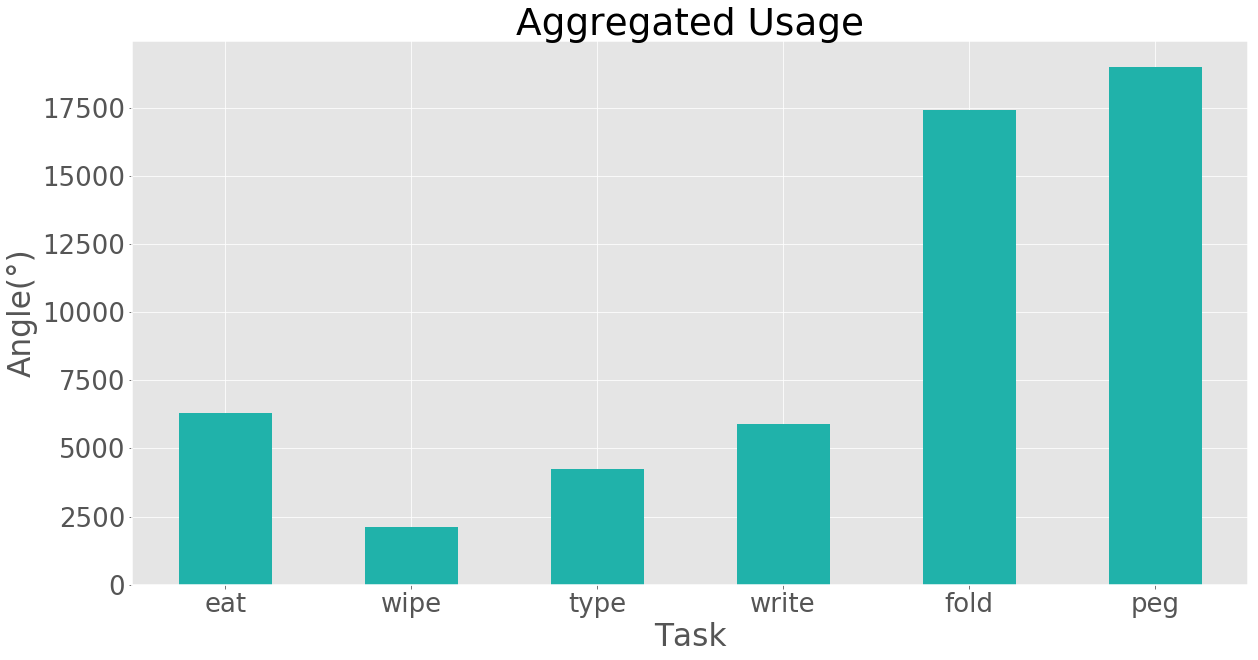

In [22]:

df3.Fabs.plot.bar(color=['lightseagreen'],subplots=True,figsize=(20,10))
plt.title('Aggregated Usage')
plt.ylabel('Angle(°)')

plt.xlabel("Task")
plt.xticks(rotation=0)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


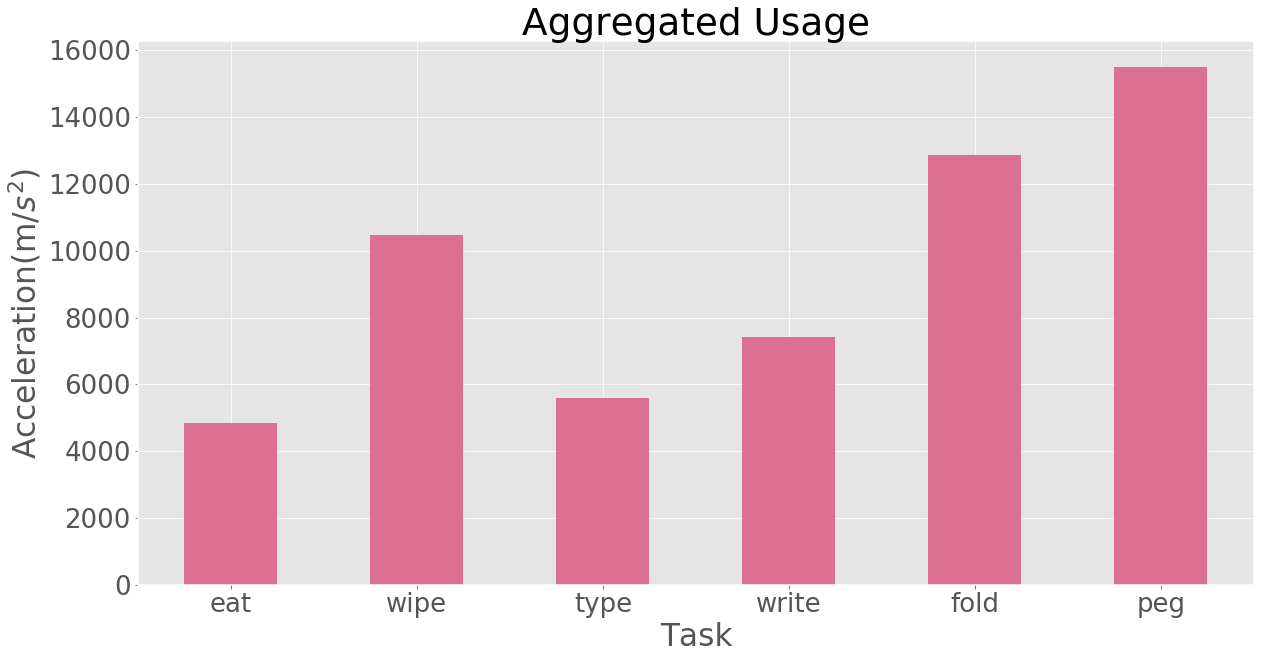

In [23]:
df3.Norm.plot.bar(color=['palevioletred'],subplots=True,figsize=(20,10))
plt.title('Aggregated Usage')
plt.ylabel('Acceleration(m/$s^2$)')



plt.xlabel("Task")
plt.xticks(rotation=0)

In [24]:
#df4["Task"] = activity
df4

,Fabs,Norm
eat,6309.882651,4843.467866
wipe,2127.355640,10480.253820
type,4232.278100,5577.161877
write,5902.253758,7419.761542
fold,17411.808479,12859.248010
peg,18984.493491,15497.823382


In [25]:
df.index = df.index.time

([<matplotlib.axis.XTick at 0x13a1a5550>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


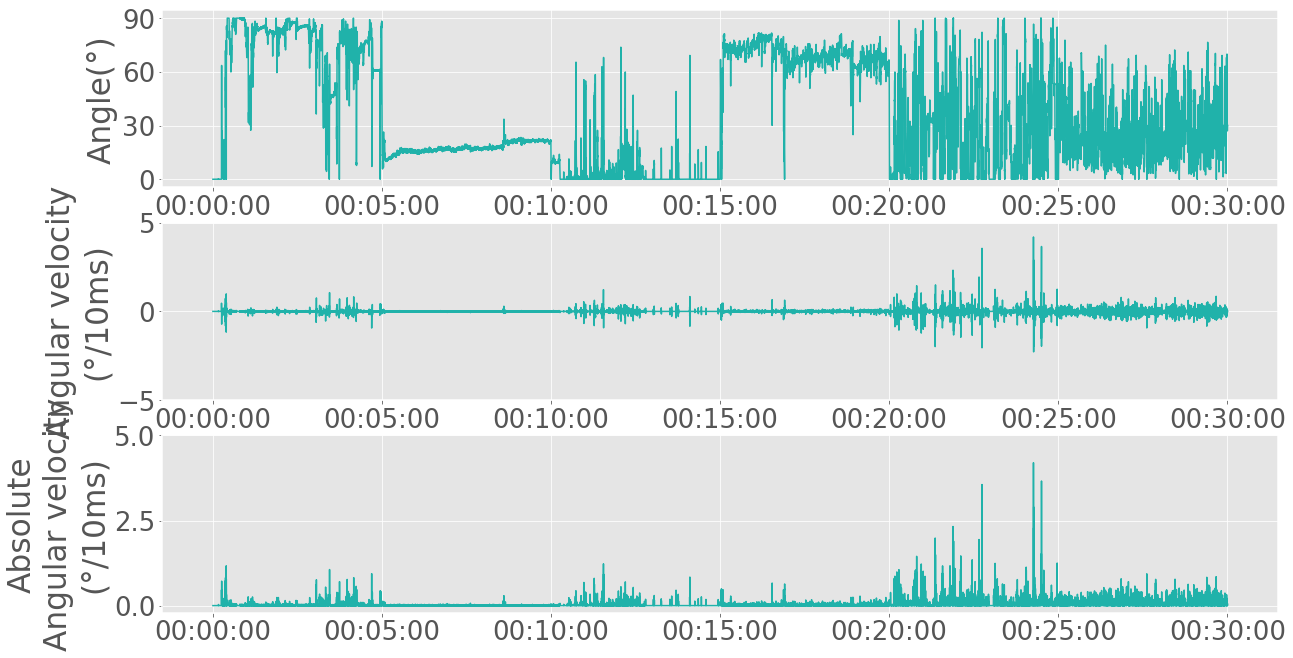

In [26]:
matplotlib.rcParams['figure.figsize'] = (20,15)

plt.subplot(4,1,1)
plt.plot(df.index,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")
plt.xlabel("")
plt.yticks([0,30,60,90])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(4,1,2)
plt.plot(df.index,df.Diff,'lightseagreen')
plt.ylabel("Angular velocity\n(°/10ms)")
plt.xlabel("")
plt.yticks([-5,0,5])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(4,1,3)
plt.plot(df.index,df.Fabs,'lightseagreen')
plt.ylabel("Absolute\nAngular velocity\n(°/10ms)")
plt.xlabel("")
plt.yticks([0,2.5,5])
plt.xticks([0,300,600,900,1200,1500,1800])





([<matplotlib.axis.XTick at 0x1a7afb8d0>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


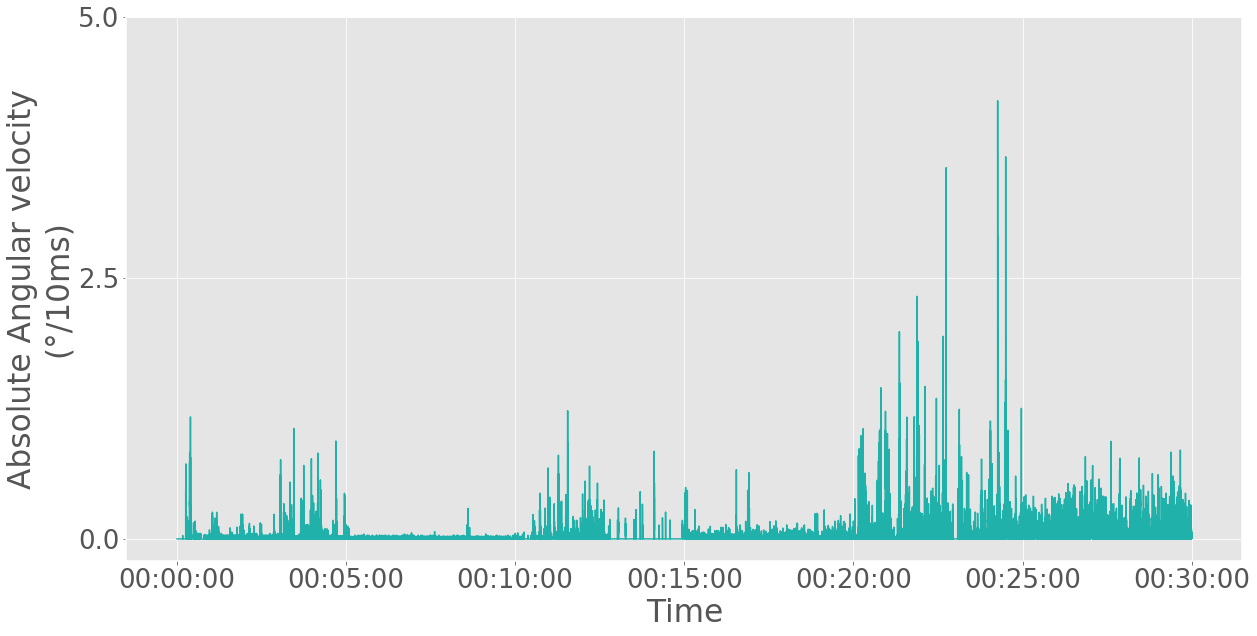

In [36]:
matplotlib.rcParams['figure.figsize'] = (20,10)

'''
plt.plot(df.index,df.Angle,'lightseagreen')
plt.ylabel("Angle\n(°)")
plt.xlabel("Time")
plt.yticks([0,30,60,90])
plt.xticks([0,300,600,900,1200,1500,1800])


#plt.subplot(4,1,2)
plt.plot(df.index,df.Diff,'lightseagreen')
plt.ylabel("Angular velocity\n(°/10ms)")
plt.xlabel("Time")

plt.yticks([-5,0,5])
plt.xticks([0,300,600,900,1200,1500,1800])
'''
#plt.subplot(4,1,3)
plt.plot(df.index,df.Fabs,'lightseagreen')
plt.ylabel("Absolute Angular velocity\n(°/10ms)")
plt.xlabel("Time")
plt.yticks([0,2.5,5])
plt.xticks([0,300,600,900,1200,1500,1800])




([<matplotlib.axis.XTick at 0x165fa7358>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


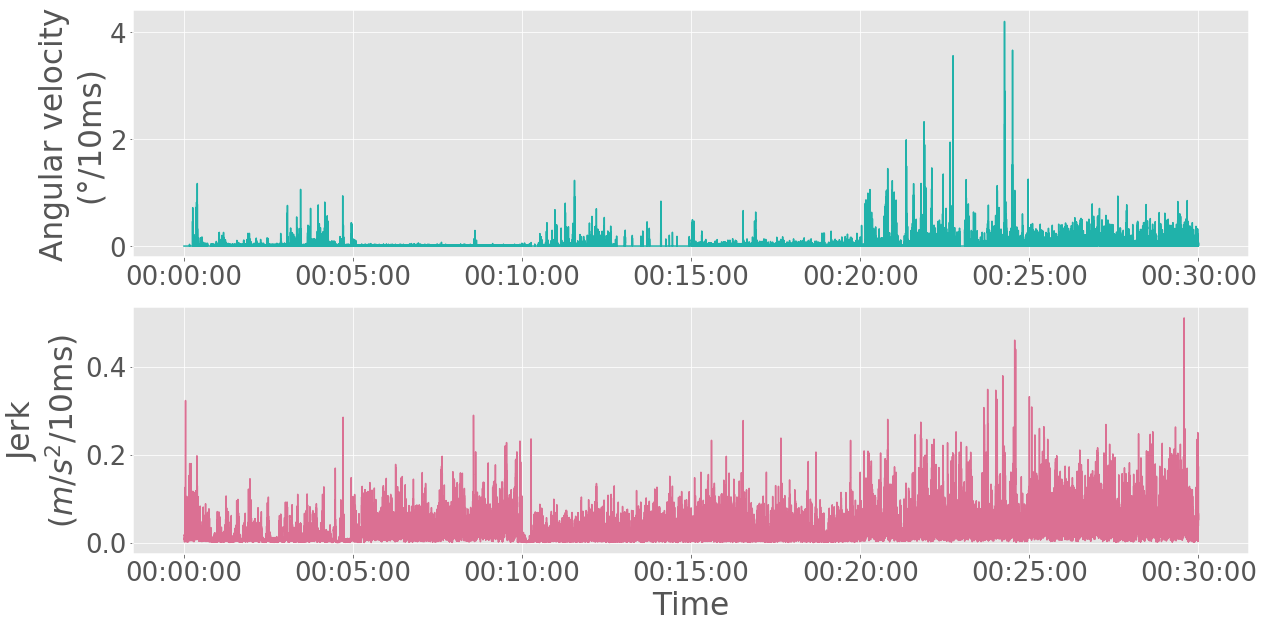

In [28]:
plt.subplot(2,1,1)
plt.plot(df.index,df.Fabs,'lightseagreen')
plt.ylabel("Angular velocity\n(°/10ms)")
plt.xlabel("")
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(2,1,2)
plt.plot(df.index,df.Norm,'palevioletred')
plt.ylabel("Jerk\n($m/s^2$/10ms)")
plt.xlabel("Time")
plt.xticks([0,300,600,900,1200,1500,1800])



In [29]:
df_acc_diff.index = df_acc_diff.index.time

([<matplotlib.axis.XTick at 0x1b1344780>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


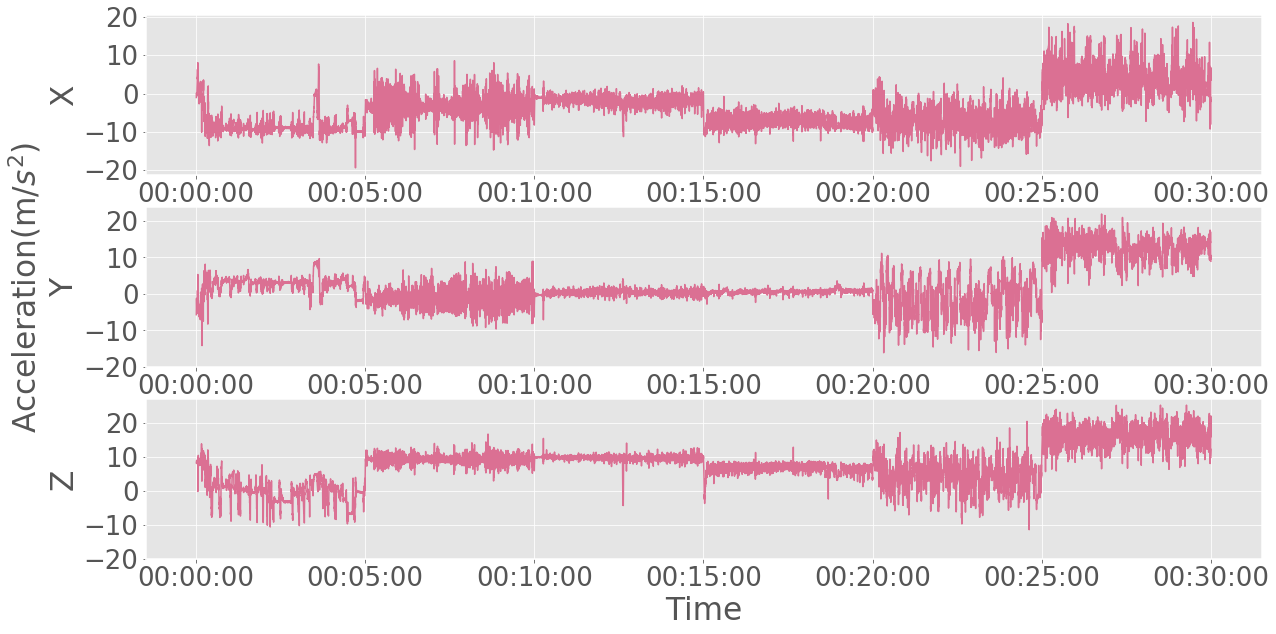

In [30]:

plt.subplot(3,1,1)
plt.plot(df.index,df.Acc_X,'palevioletred')
plt.ylabel("X")
plt.xlabel("")
plt.yticks([-20,-10,0,10,20])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(3,1,2)
plt.plot(df.index,df.Acc_Y,'palevioletred')
plt.ylabel("Acceleration(m/$s^2$)\nY")
plt.xlabel("")
plt.yticks([-20,-10,0,10,20])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(3,1,3)
plt.plot(df.index,df.Acc_Z,'palevioletred')
plt.ylabel("Z")
plt.xlabel("Time")
plt.yticks([-20,-10,0,10,20])
plt.xticks([0,300,600,900,1200,1500,1800])

([<matplotlib.axis.XTick at 0x1667f6780>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


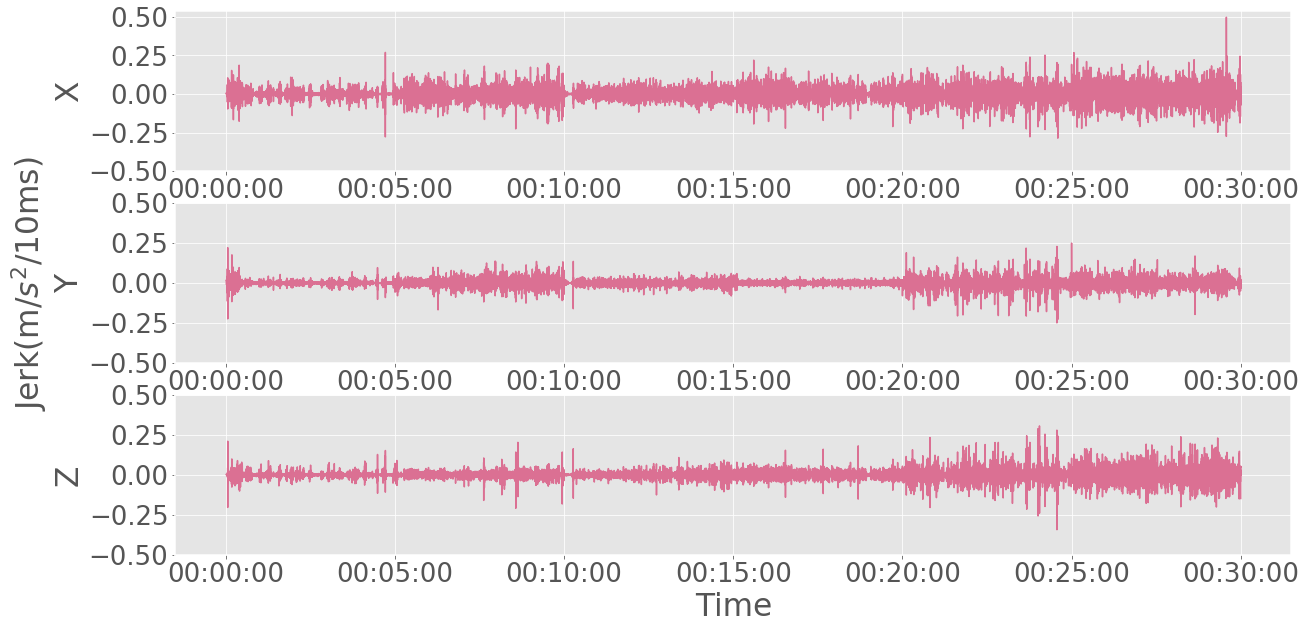

In [31]:
df_acc_diff=df_acc_diff.astype(float)
df_acc_diff["Fabs_X"] = np.fabs(df_acc_diff.Acc_X)
df_acc_diff["Fabs_Y"] = np.fabs(df_acc_diff.Acc_Y)
df_acc_diff["Fabs_Z"] = np.fabs(df_acc_diff.Acc_Z)

plt.subplot(3,1,1)
plt.plot(df_acc_diff.index,df_acc_diff.Acc_X,'palevioletred')
plt.ylabel("X")
plt.xlabel("")
plt.yticks([-0.5,-0.25,0,0.25,0.5])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(3,1,2)
plt.plot(df_acc_diff.index,df_acc_diff.Acc_Y,'palevioletred')
plt.ylabel("Jerk(m/$s^2$/10ms)\nY")
plt.xlabel("")
plt.yticks([-0.5,-0.25,0,0.25,0.5])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(3,1,3)
plt.plot(df_acc_diff.index,df_acc_diff.Acc_Z,'palevioletred')
plt.ylabel("Z")
plt.xlabel("Time")
plt.yticks([-0.5,-0.25,0,0.25,0.5])
plt.xticks([0,300,600,900,1200,1500,1800])


([<matplotlib.axis.XTick at 0x174c6c518>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


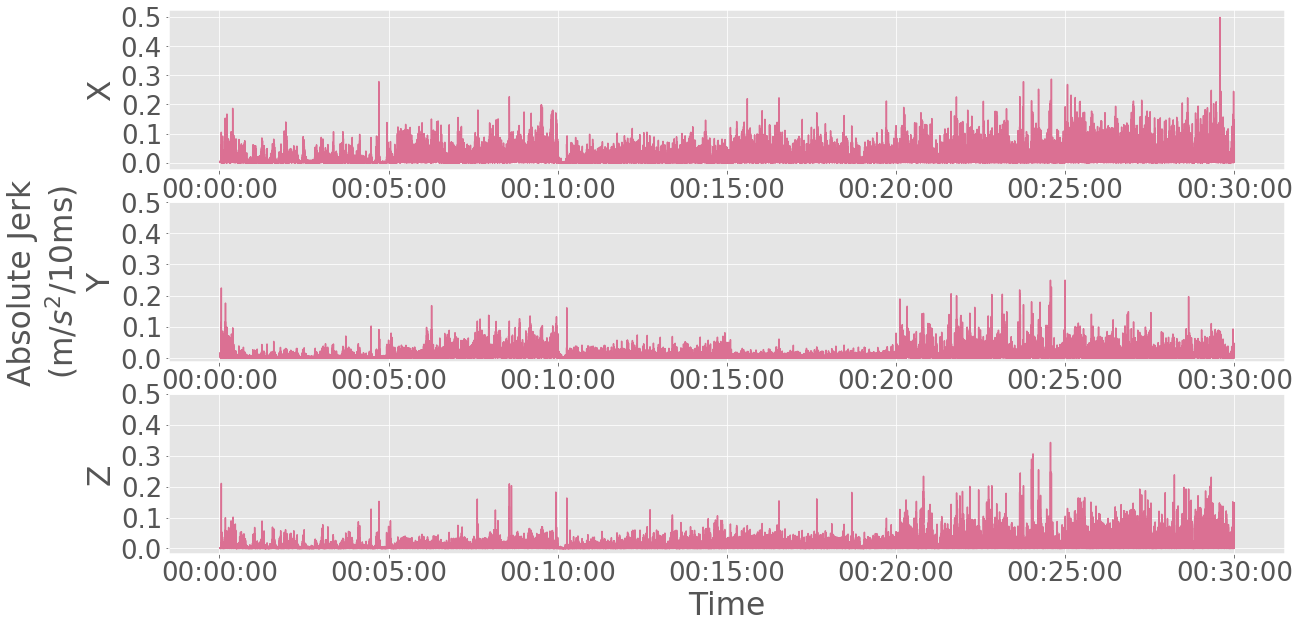

In [32]:
df_acc_diff=df_acc_diff.astype(float)
df_acc_diff["Fabs_X"] = np.fabs(df_acc_diff.Acc_X)
df_acc_diff["Fabs_Y"] = np.fabs(df_acc_diff.Acc_Y)
df_acc_diff["Fabs_Z"] = np.fabs(df_acc_diff.Acc_Z)

plt.subplot(3,1,1)
plt.plot(df_acc_diff.index,df_acc_diff.Fabs_X,'palevioletred')
plt.ylabel("X")
plt.xlabel("")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(3,1,2)
plt.plot(df_acc_diff.index,df_acc_diff.Fabs_Y,'palevioletred')
plt.ylabel("Absolute Jerk\n(m/$s^2$/10ms)\nY")
plt.xlabel("")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.xticks([0,300,600,900,1200,1500,1800])

plt.subplot(3,1,3)
plt.plot(df_acc_diff.index,df_acc_diff.Fabs_Z,'palevioletred')
plt.ylabel("Z")
plt.xlabel("Time")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.xticks([0,300,600,900,1200,1500,1800])



([<matplotlib.axis.XTick at 0x1653f54a8>,
 <a list of 7 Text xticklabel objects>)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


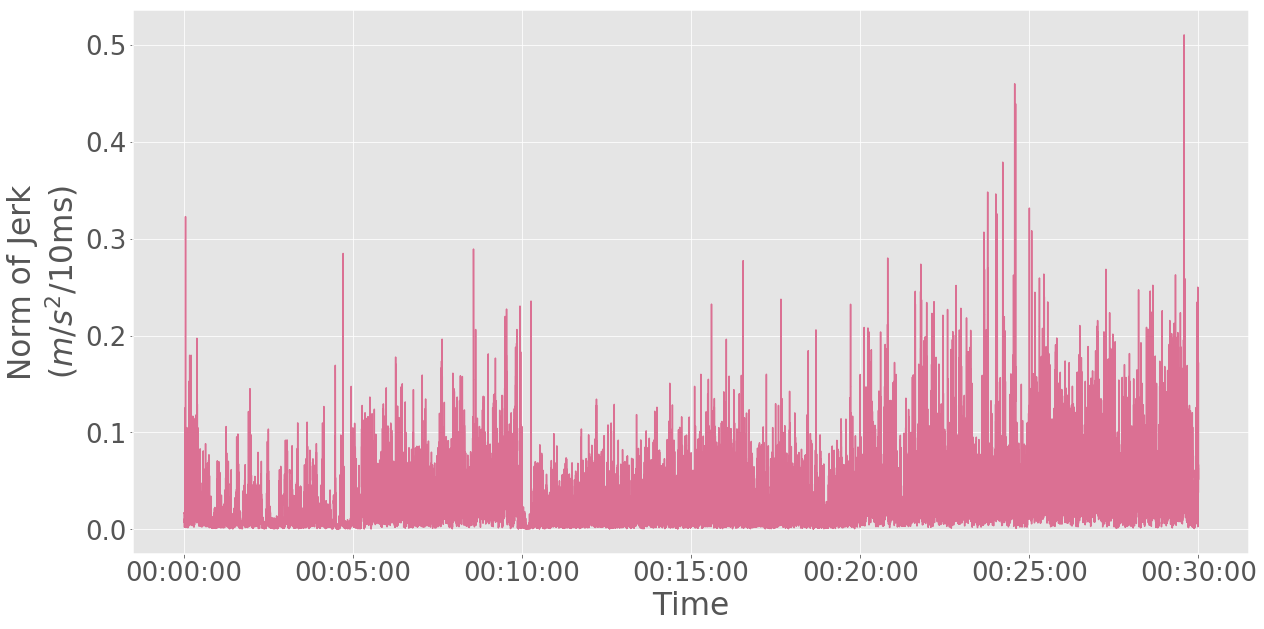

In [33]:
plt.plot(df.index,df.Norm,'palevioletred')
plt.ylabel("Norm of Jerk\n($m/s^2$/10ms)")
plt.xlabel("Time")
plt.xticks([0,300,600,900,1200,1500,1800])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


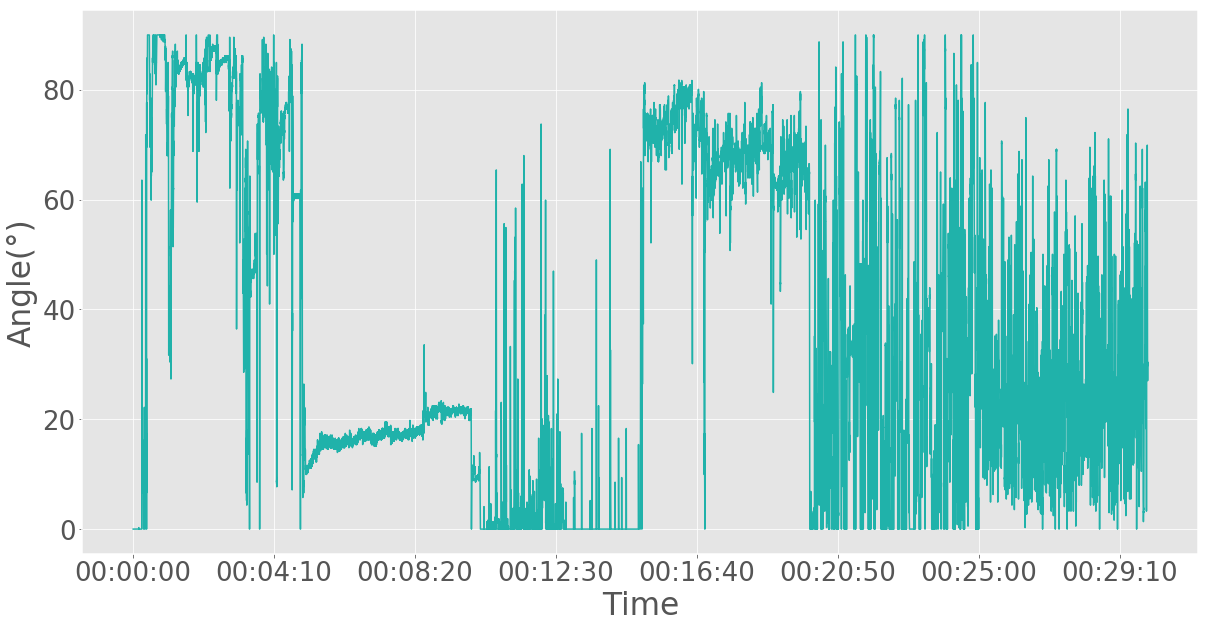

In [34]:
plt.plot(df.index,df.Angle,'lightseagreen')
plt.ylabel("Angle(°)")
plt.xlabel("Time")

#plt.xticks([0,300,600,900,1200,1500])
